In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

In [2]:
Diab_data=pd.read_csv('diabetes.csv')
Diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
Diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Outcome')

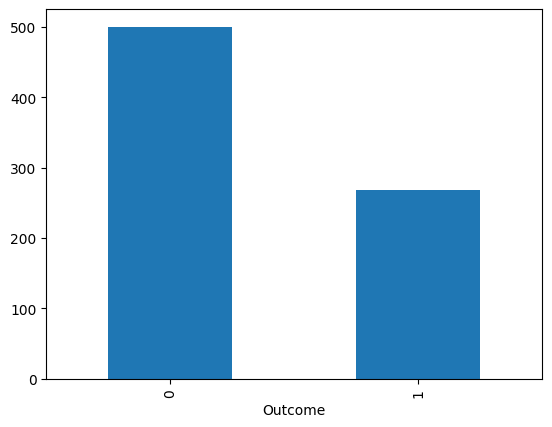

In [5]:
Diab_data['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')

In [6]:
Diab_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


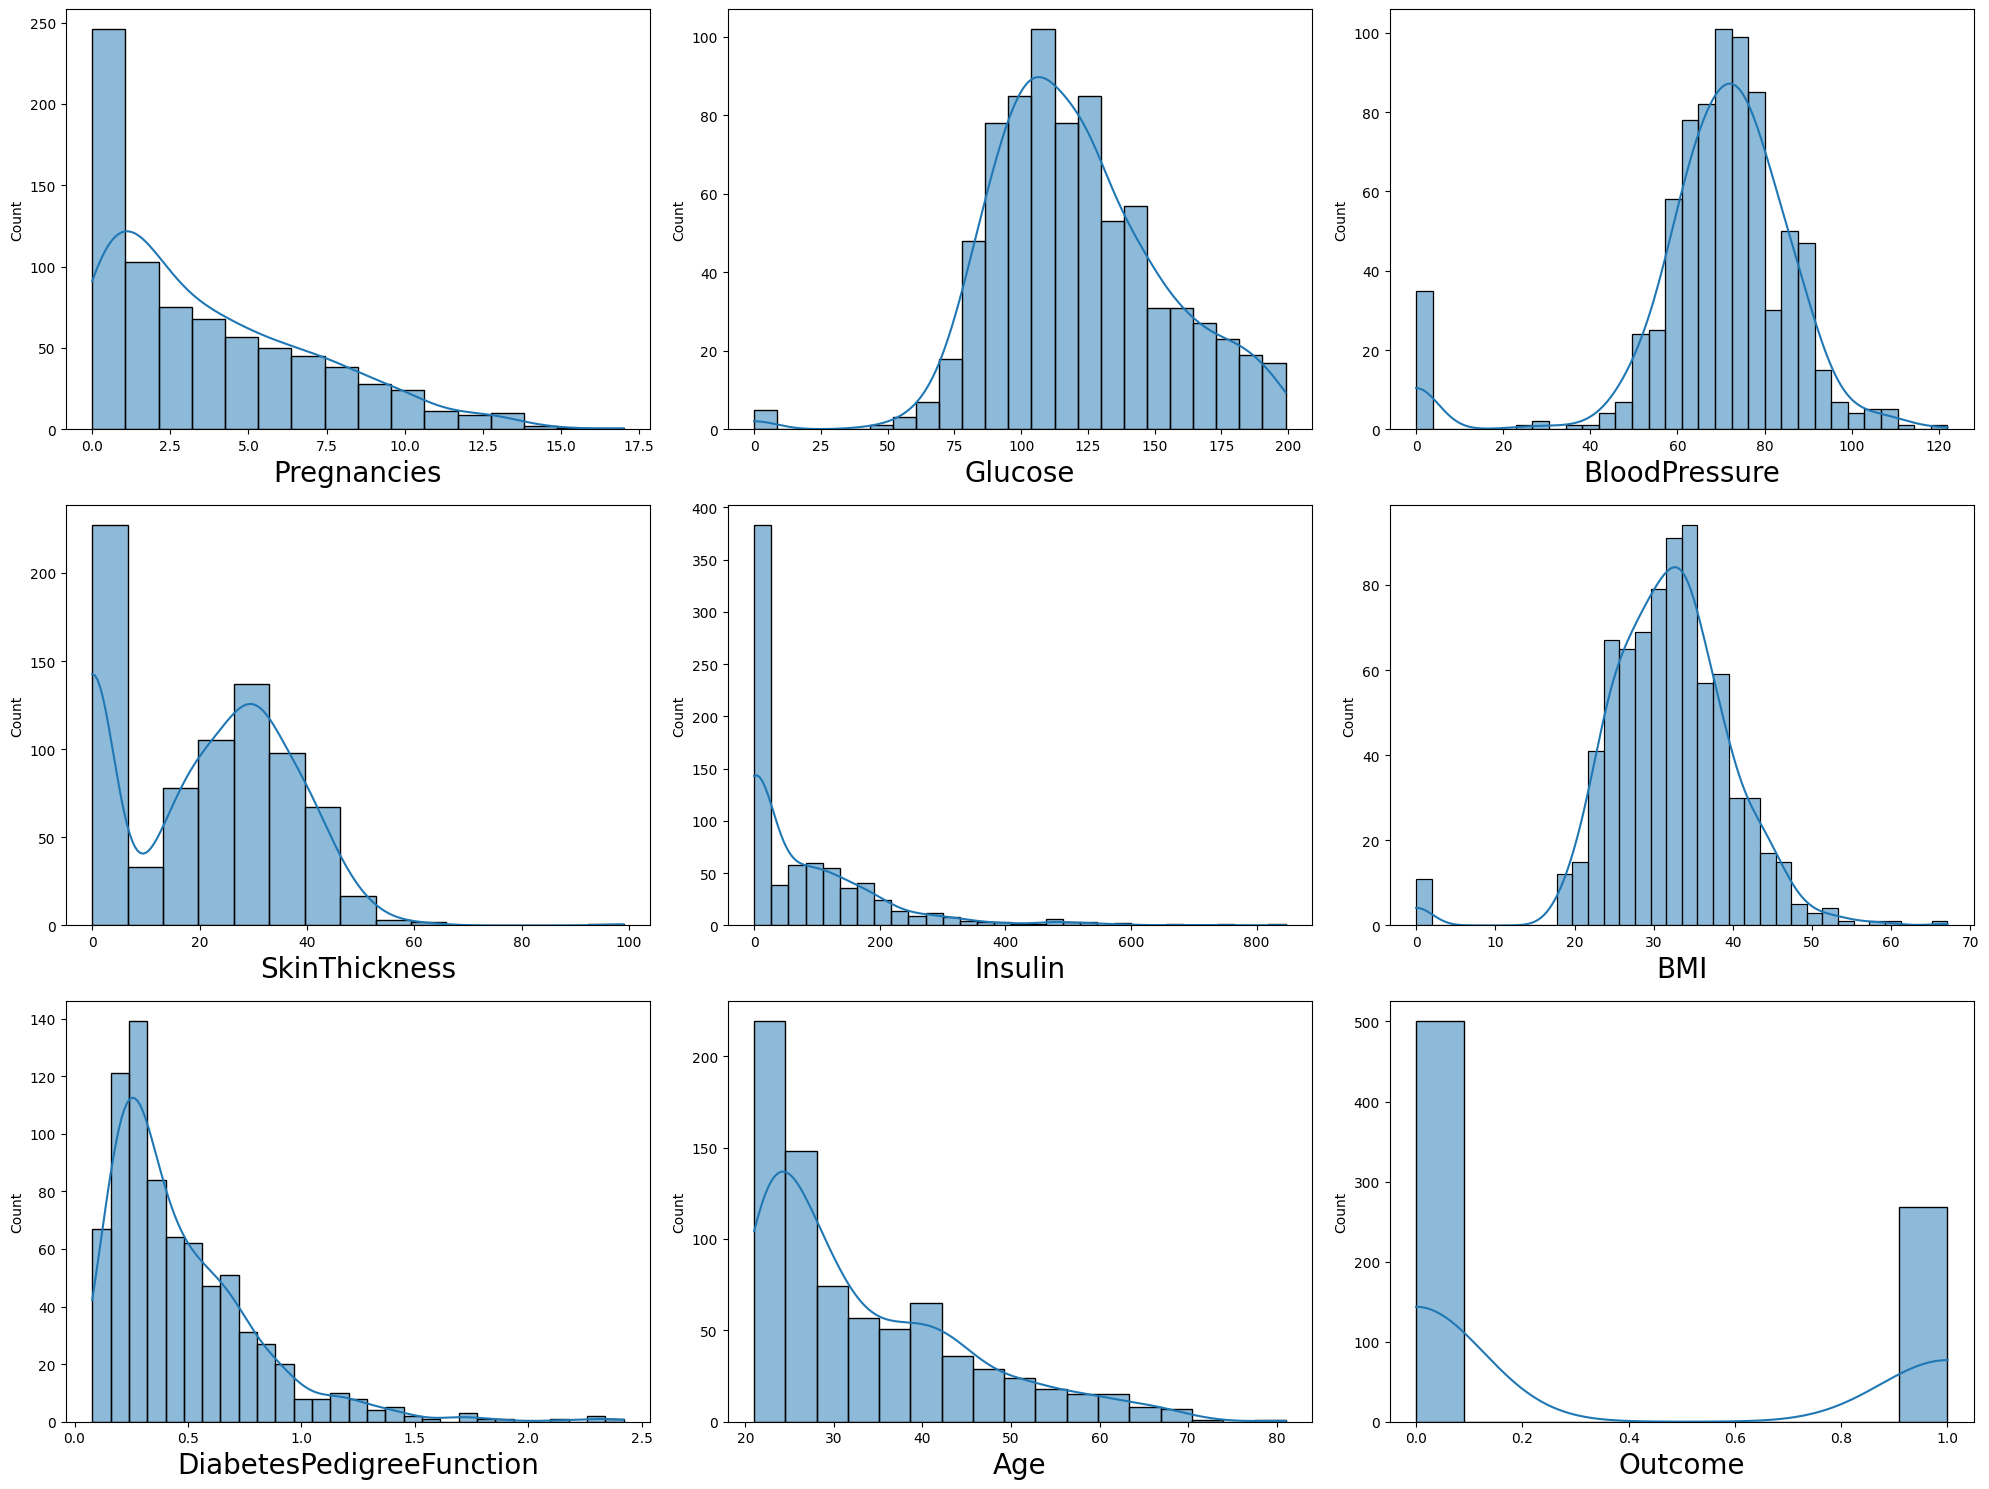

In [7]:
# Lets see the minimum and maximum values of each feature in plots
Diab_data.min(), Diab_data.max()
plt.figure(figsize=(20,15))
plotnumber=1
for column in Diab_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(Diab_data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [8]:
#standardization of the data
X=Diab_data.drop(columns='Outcome',axis=1)
Y=Diab_data['Outcome']
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
Y=np.array(Y)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [9]:
#balancing the data
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,Y=smote.fit_resample(X,Y)
print(np.unique(Y,return_counts=True))


(array([0, 1], dtype=int64), array([500, 500], dtype=int64))


In [10]:
#splitting the data into training and testing data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)  
print(X.shape, X_train.shape, X_test.shape)

(1000, 8) (800, 8) (200, 8)


In [11]:
#use SVM model to train the data
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
#accuracy on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ',training_data_accuracy)
#accuracy on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ',test_data_accuracy)
#making a predictive system
input_data=(5,166,72,19,175,25.8,0.587,51)
#changing the input_data to numpy array
input_data_as_numpy_array=np.array(input_data)
#reshaping the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardizing the input data
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)
if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')
    

Accuracy on training data :  0.75375
Accuracy on test data :  0.785
[1]
The person is diabetic


c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
